# Schelling Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class SchellingModel:
    def __init__(self, size, empty_ratio, similarity_threshold):
        self.size = size
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.grid = self.initialize_grid()
        self.step_count = 0
        self.all_happy = False

    def initialize_grid(self):
        n_agents = self.size * self.size * (1 - self.empty_ratio)
        n_red = int(n_agents / 2)
        n_blue = n_red
        
        agents = [1] * n_red + [-1] * n_blue + [0] * int(self.size * self.size * self.empty_ratio)
        random.shuffle(agents)
        
        return np.array(agents).reshape((self.size, self.size))

    def get_neighbors(self, x, y):
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.size and 0 <= ny < self.size:
                    neighbors.append(self.grid[nx][ny])
        return neighbors

    def is_happy(self, x, y):
        neighbors = self.get_neighbors(x, y)
        same_type_count = sum(1 for neighbor in neighbors if neighbor == self.grid[x][y])
        return (same_type_count / len(neighbors)) >= self.similarity_threshold

    def step(self):
        self.step_count += 1
        all_happy = True
        for x in range(self.size):
            for y in range(self.size):
                if self.grid[x][y] != 0 and not self.is_happy(x, y):
                    all_happy = False
                    empty_cells = [(i,j) for i in range(self.size) for j in range(self.size) if self.grid[i][j] == 0]
                    if empty_cells:
                        new_x, new_y = random.choice(empty_cells)
                        self.grid[new_x][new_y] = self.grid[x][y]
                        self.grid[x][y] = 0
        self.all_happy = all_happy

    def run_simulation(self, steps):
        for _ in range(steps):
            if not self.all_happy:
                self.step()

    def plot_grid(self, title):
        plt.figure(figsize=(6, 6))
        
        plt.imshow(self.grid, interpolation='nearest')
        plt.colorbar()
        plt.title(title + ", steps: " + str(self.step_count))
        plt.axis('off')
        plt.show()

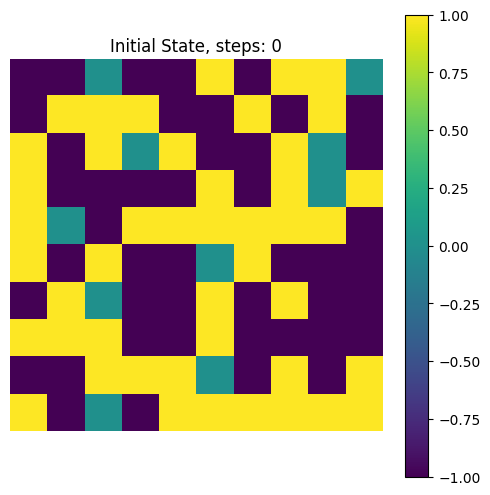

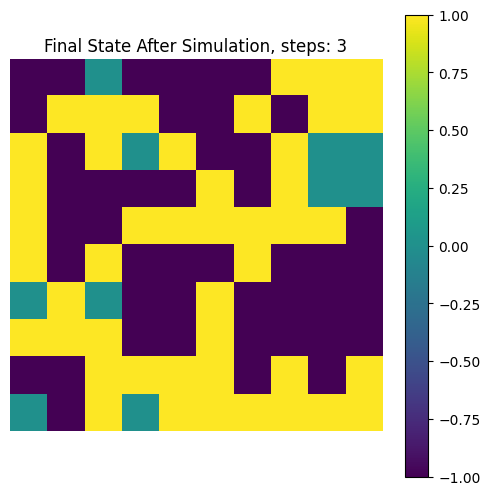

In [3]:
model = SchellingModel(size=10, empty_ratio=0.1, similarity_threshold=2/8)
model.plot_grid("Initial State")
model.run_simulation(1000)
model.plot_grid("Final State After Simulation")